In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from tqdm.notebook import tqdm
import random

In [8]:
M = 100
im_dim = 100

r = np.random.randint(2, size=(M,nbits))

W = np.zeros((nbits,nbits))
for i in range(M):
    W += np.outer((r[i]-1/2),(r[i]-1/2))#finding weights based on image
    
print(np.shape(W))
np.fill_diagonal(W,0)

#@jit(nopython=True)
def run(iterations,W,neurons,interval):
    imgs_interval = []
    neurons_interval = []
    neuron_iter = neurons
    for i in tqdm(range(iterations)):
        index = random.sample(range(0, len(neurons)), 100);
        selecW = W[index,:]
        selecW = selecW[:,index]
        neuron_iter[index] = np.dot(selecW,neuron_iter[index])>=0
        if i%interval==0:
            imgs_interval.append(np.reshape(np.packbits(neuron_iter),im_size))
            neurons_interval.append(neuron_iter)
    return imgs_interval,neurons_interval

NameError: name 'nbits' is not defined

In [89]:
print(np.shape(W))
np.fill_diagonal(W,0)
print(W)

(800, 800)
[[ 0.  -0.5  3.  ...  1.   2.5  2. ]
 [-0.5  0.  -3.5 ... -2.5 -4.   1.5]
 [ 3.  -3.5  0.  ...  4.   0.5 -6. ]
 ...
 [ 1.  -2.5  4.  ...  0.   0.5 -1. ]
 [ 2.5 -4.   0.5 ...  0.5  0.  -3.5]
 [ 2.   1.5 -6.  ... -1.  -3.5  0. ]]


In [90]:
#@jit(nopython=True)
def run(iterations,W,neurons,interval):
    imgs_interval = []
    neurons_interval = []
    neuron_iter = neurons
    for i in tqdm(range(iterations)):
        index = random.sample(range(0, len(neurons)), 100);
        selecW = W[index,:]
        selecW = selecW[:,index]
        neuron_iter[index] = np.dot(selecW,neuron_iter[index])>=0
        if i%interval==0:
            imgs_interval.append(np.reshape(np.packbits(neuron_iter),im_size))
            neurons_interval.append(neuron_iter)
    return imgs_interval,neurons_interval

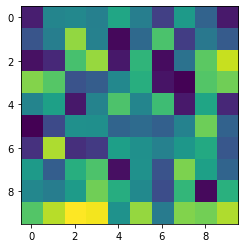

In [91]:
#create neural network with all neurons assigned 0/1 randomly with prob=0.5
#except for the first neurons which are set to the values of the image
neurons = r[0]
#neurons[0:int(nbits*.5)] = to_use[0:int(nbits*.5)]
#neurons[int(nbits*.7):nbits] = to_use[int(nbits*.7):nbits]
plt.imshow(np.reshape(np.packbits(neurons[0:nbits]),im_size))

In [92]:
imgs,neurons = run(1000,W,neurons,10)

  0%|          | 0/1000 [00:00<?, ?it/s]

[]

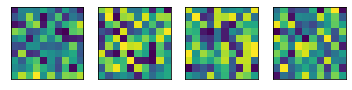

In [93]:
fig, axs = plt.subplots(1,4)
axs[0].imshow(imgs[0]);
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].imshow(imgs[33]);
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].imshow(imgs[66]);
axs[2].set_xticks([])
axs[2].set_yticks([])
axs[3].imshow(imgs[99]);
axs[3].set_xticks([])
axs[3].set_yticks([])

In [94]:
err = (imgs[0]-imgs[99])>0
err = np.mean(err)
print(err)

1.0
